# **Predicting the outcome of a Brazilian Jiu Jitsu (BJJ) 🥋 match, AUC score of ~0.87**

⏲️ **The deadline: see what could be accomplished in 2 months.**

---

##**Why I did this project**
1. To learn/apply data skills to a domain that I understand and enjoy doing/watching
2. I haven't seen many analytics projects around this domain so wanted to try something potentially new
3. Hopefully encourage more data driven projects around this domain and other grappling sports

---

Note on points 2 + 3...

I see BJJ as a developing sport e.g. leg locks becoming part of more modern games when they weren't before. However I haven't seen many if any analytics. I see this analysis being a useful tool for
* **Match makers** - pair competitors with similar performances or certain styles
* **Coaches** - use data to analyse who their next competitor is and their style both currently and historically to improve training schedules for competition
* **Analysts/commentators** - stats about a fighter can be useful but when you have to watch hours of footage to get them, not efficient. These simple features can help find stats about a fighter to date or historically. Also some stats that aren't necessarily obvious or easy to compute using a brain could be encorporated into live commentatary. 


People believe BJJ is a complex sport. It is, but I believe match outcomes can be analysed using basic feature engineering focused around a fighter's historic performances and attributes.

##**What is BJJ (speedrun)**
Have you heard of Judo? Yes? Ok, it's like Judo.

You haven't heard of Judo? No? Ok, it's like greco roman wrestling.

You haven't heard of greco roman wrestling? Ok, it's grappling with submissions.

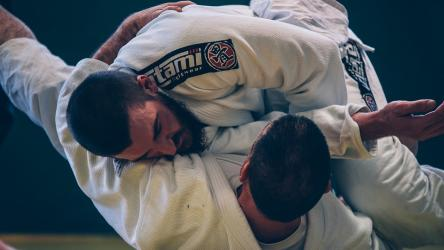

**Methods of winning**
* Submission - chokes, joint locks, pressure...
* Points

Points are awarded for acquiring certain positions (I won't go into them specifically). However if a submission is achieved regardless of who is up on points the match ends.

##**The data**
The dataset is from the majority of high level competition matches from 2000 - early 2020 in multiple competition formats e.g. Gi (white pyjamas) or No gi (rashguards and shorts).

I won't go into the data collection and cleanup here but the major problem was the format. The matches were without any historical features, so I baked them into the data.

This was done primarily for each fighter by
1. Creating an indicator for a feature e.g. win via submission
2. Calculating cumulative sums for the indicator up to a match
3. Lagging it by one to get the e.g. wins via submission to date

Also a fighter's "profile" is built from the earliest match in the data.

###**Main columns**
* `id` - id of the match
* `fighter_a` - name of fighter a
* `fighter_b` - name of fighter b
* `w_l` - indicate if `fighter_a` won or lost
* `year` - year of the match
* `division` - division of the match (based upon a weight column previously in the data)
* `a_vs_b_year` - number of times a has faced b in the year
* `a_vs_b_overall` - number of times a has faced b in the entire time period

###**Fighter columns**
Each fighter has the following features denoted using x or y e.g. `w.x` and `w.y`, where x is `fighter_a` and y is `fighter_b`.
* `current_win_streak` - current win streak
* `current_lose_streak` - current lose streak 
* `cum_win_sub` - wins via submission
* `cum_lose_sub` - losses via submission
* `cum_win_points` - wins via submission
* `cum_lose_points` - losses via submission
* `cum_win_unknown` - wins via unknown method (there were matches with methods that were marked unknown in the data, these were considered necessary to keep)
* `cum_lose_unknown` - losses via unknown method (same as above)
* `cum_win_dq` - wins via dq
* `cum_lose_dq` - losses via dq
* `cum_adcc_trials` - wins at adcc trials
* `cum_adcc_match` - matches at adcc
* `cum_adcc_win` - wins at adcc
* `cum_adcc_lose` - losses at adcc
* `cum_adcc_bronze` - adcc bronzes
* `cum_adcc_silver` - adcc silvers
* `cum_adcc_gold` - adcc golds
* `pan am_gold` - pan am golds
* `pan am_silver` - pan am silvers
* `pan am_bronze` - pan am bronzes
* `mundial_gold` - mundial golds
* `mundial_silver` - mundial silvers
* `mundial_bronze` - mundial bronzes
* `w` - top winning method(s) e.g. submission via armbar
* `l` - top losing method(s) e.g. loss via points
* `w_yearly` - top winning method(s) in the current year
* `l_yearly` - top lossing method(s) in the current year
* `leg_locker` - wins via leg lock
* `leg_locked` - losses via leg lock

###**Rationale behind features**
The majority of the features are focused around different kinds of wins. I considered what features might contribute to a fighter's historic performance to create a good model.

Some examples

* **Competitions** - the mundials, adcc and the pan ams are some of the top competitions in BJJ hence bronze, silver and gold medal wins were flagged. Adcc trials were highlighted as being invited to the trials could indicate a potential good fighter.
* **Leg locks** - leg locks have become a necessary tool to have in your skillset not necessarily to attack with but to be able to understand them and defend against them hence I've identified a fighter's wins and losses via leg locks. You could debate leg locks are like a different sport.
* **Methods** - a fighter may have a frequent method of winning and another fighter might have a frequent method of losing, if they get paired up and A's strength is B's weakness, A may have a higher likelihood of winning

##**Modelling approaches**

I've opted to use a neural net and xgboost as my models to baseline with, I understand Logistic Regression is more common but this project was also about exploring new techniques of modelling. 

It should be noted that this is by no means a thorough modelling process more of a quick baseline. I have chosen to use **bayesian optimisation** to "mini" tune the neural net but I haven't chose to tune the xgboost model (again bayesian optimisation or Optuna would be my go to methods).

Following the baseline I would consider what features to drop and those to potential engineer in the data. Also seeing what data the model is struggling to predict to consider what features may be needed e.g. is it finding predicting `rooster` division matches? 

###**Setting up environment**

In [2]:
!pip install fastbook -Uqq
!pip install bayesian-optimization -q

     |████████████████████████████████| 719 kB 4.8 MB/s 
     |████████████████████████████████| 121 kB 13.3 MB/s 
     |████████████████████████████████| 187 kB 15.2 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 1.0 MB 20.6 MB/s 
     |████████████████████████████████| 47 kB 5.1 MB/s 
     |████████████████████████████████| 785 kB 38.7 MB/s 
     |████████████████████████████████| 2.2 MB 45.2 MB/s 
     |████████████████████████████████| 170 kB 64.8 MB/s 
     |████████████████████████████████| 120 kB 54.2 MB/s 
     |████████████████████████████████| 75 kB 5.4 MB/s 
     |████████████████████████████████| 9.9 MB 64.5 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
     |████████████████████████████████| 748.8 MB 8.5 kB/s 
     |████████████████████████████████| 5.9 MB 33.8 MB/s 
     |████████████████████████████████| 11.6 MB 123 kB/s 
     |████████████████████████████████| 40 kB 5.9 MB/s 
     |██████████████████

In [3]:
import fastbook
import pandas as pd
from math import e
from bayes_opt import BayesianOptimization
from fastai.tabular.all import *
fastbook.setup_book()

Mounted at /content/gdrive


###**Importing and viewing data**

The data is a csv that requires some different encoding due to accents in fighter names. `stage` is dropped as upon analysis outside of this notebook, proved too messy to clean up. `id` is dropped as it isn't used for modelling.

In [4]:
# Read in data
matches = pd.read_csv("matches.csv", encoding = "iso-8859-1")

# stage and id dropped
matches.drop(["id", "stage"], axis = 1, inplace = True)

# View data
matches.tail(5)

,fighter_a,fighter_b,w_l,year,division,w.x,w.y,l.x,l.y,leg_locker.x,leg_locked.x,leg_locker.y,leg_locked.y,cum_adcc_gold.x,pan am_gold.x,mundial_gold.x,cum_adcc_gold.y,pan am_gold.y,mundial_gold.y,cum_adcc_silver.x,pan am_silver.x,mundial_silver.x,cum_adcc_silver.y,pan am_silver.y,mundial_silver.y,cum_adcc_bronze.x,pan am_bronze.x,mundial_bronze.x,cum_adcc_bronze.y,pan am_bronze.y,mundial_bronze.y,l_yearly.x,l_yearly.y,w_yearly.x,w_yearly.y,cum_adcc_lose.x,cum_adcc_lose.y,cum_adcc_match.x,cum_adcc_match.y,cum_adcc_trials.x,cum_adcc_trials.y,cum_adcc_win.x,cum_adcc_win.y,cum_lose_dq.x,cum_lose_dq.y,cum_lose_points.x,cum_lose_points.y,cum_lose_sub.x,cum_lose_sub.y,cum_lose_unknown.x,cum_lose_unknown.y,cum_matches.x,cum_matches.y,cum_win_dq.x,cum_win_dq.y,cum_win_points.x,cum_win_points.y,cum_win_sub.x,cum_win_sub.y,cum_win_unknown.x,cum_win_unknown.y
39391,zigmars evamois,matthew leighton,l,2018,super heavy,NaN,points,NaN,points,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,0,0.0,0,0.0,1.0,0.0,NaN,points,NaN,points,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,6.0,0,2.0,0,0.0,0,30.0,0,0.0,0,10.0,0,12.0,0,0.0
39392,zigmars evamois,matthew leighton,l,2018,abs,none,points,triangle,points,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,1.0,0.0,0,0.0,0,0.0,1.0,0.0,NaN,points,NaN,points,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,6.0,1,2.0,0,0.0,1,31.0,0,0.0,0,10.0,0,13.0,0,0.0
39393,zois kaperonis,eldar rafigaev,l,2018,super heavy,NaN,leg_lock,NaN,points,0,0,31.0,1.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,NaN,points,NaN,leg_lock,0,0.0,0,0.0,0,2.0,0,0.0,0,1.0,0,6.0,0,2.0,0,1.0,0,50.0,0,2.0,0,6.0,0,30.0,0,2.0
39394,zorobadel m.,marcelo garcia,l,2006,middle,NaN,points,NaN,points,0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,NaN,points,NaN,points,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
39395,zumbi machado,roger gracie,l,2006,abs,NaN,points,NaN,points,0,0,1.0,0.0,0,0.0,0,0.0,1.0,0.0,0,0.0,0,0.0,1.0,0.0,0,0.0,0,0.0,1.0,0.0,NaN,points,NaN,points,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1.0,0,0.0,0,0.0,0,8.0,0,0.0,0,0.0,0,7.0,0,0.0


###**Setting up neural network and preprocessing**
* Declare dependent variable `w_l`
* Setting up preprocessers using fast ai
* Defining categorical variables
* Defining continuous variables

In [5]:
dep_var = 'w_l'
procs = [FillMissing, Normalize, Categorify]
cat = ['year', 'fighter_a', 'fighter_b', 'division', 'w.x', 'w.y', 'l.x', 'l.y', 'w_yearly.x', 'w_yearly.y', 'l_yearly.x', 'l_yearly.y']
cont = list(set(matches.columns) - set(cat + [dep_var]))

Some columns required filling blanks as the data cleanup didn't fill these. I know from the data cleanup that the missing values are in the engineered features that are a result of the lagging when cumulative summing. So
* Categorical filled with `none`
* Continuous filled with `0`

In [6]:
for feat in ["w.x", "w.y", "l.x", "l.y", "w_yearly.x", "w_yearly.y", "l_yearly.x", "l_yearly.y"]:
  matches[feat].fillna("none", inplace = True)

for feat in cont:
  matches[feat].fillna(0, inplace = True)

Loop through each categorical feature and set it as a category. Also order `division` and `year` as they have an order to them.

In [7]:
for feat in cat:
  matches[feat] = matches[feat].astype('category')

sizes = "abs", "ultra heavy", "super heavy", "medium heavy", "heavy", "middle", "light", "feather", "light feather", "rooster"
matches['division'].cat.set_categories(sizes, ordered = True, inplace = True)

years = 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000
matches['year'].cat.set_categories(years, ordered = True, inplace = True)

When splitting the data as these are matches over time the data used for the validation set has to be appropriate. In this case I'm saying the validation dataset will be any data with it's year **after 2019**.

In [8]:
cond = (matches.year > 2019)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

Check the size of the training and validation set (~20%).

In [9]:
len(train_idx), len(valid_idx), len(valid_idx)/(len(matches))

(30760, 8636, 0.2192100720885369)

###**Dataloaders**
Most of the preparation for this has been declared earlier e.g. categorical features, but the `y_block` has to be declared, `CategoryBlock` in this case as binary classification. Also the batch sizes.

In [10]:
dls = TabularDataLoaders.from_df(matches, procs = procs, cat_names = cat, cont_names = cont, bs = 1024,
                                 y_names = dep_var, valid_idx = valid_idx, y_block = CategoryBlock())

###**Bayesian Optimisation**
Rather than train the model and guess baseline layers and hyperparameters I've opted to use Bayesian Optimisation given that it doesn't take too long to run.

The function structure
* Hyperparameter and layer inputs
* Create a tabular learner
* Use `lr_find` to approximate the best lr
* Use `fine_tune` to train the learner
* Get the auc score

Some notes about the learner
* The optimiser function is set to `SGD` and zero momentum. After playing around with optimisers this proved the best.
* `base_lr` for `fine_tune` is set to `lr_max`/`e`, reason being that `lr_find` would return `lr_max` values near to `1e-1` which I feel is too high for training so I divided it by `e` dampen it.

In [11]:
def optimize_nn_for_auc(wd:float, cycles:int, layer_1:int, layer_2:int, num_layer:int):

  # Create layers dependent on num_layer
  if num_layer == 1:
    layers = [int(layer_1)]
  else:
    layers = [int(layer_1), int(layer_2)]

  # Create tabular learner
  learn = tabular_learner(dls, metrics = [RocAucBinary()], loss_func = CrossEntropyLossFlat(),
                          layers = layers, opt_func = SGD, moms = (0, 0, 0))

  # Find the lr_max
  lr_min, lr_max = learn.lr_find(show_plot = False)

  # Run fine_tune without the progress bar (neater output)
  with learn.no_bar() and learn.no_logging():
    learn.fine_tune(int(cycles), base_lr = lr_max/e, wd = float(wd), freeze_epochs = 2)

  # Get the auc score
  auc = float(learn.validate()[1])

  return auc

# Create hyperparameters dictionary with bounds for each input
hps = {'wd': (1e-2, 0.2),
       'layer_1': (50, 700),
       'layer_2': (50, 700),
       'num_layer': (1, 3),
       'cycles': (3, 7),
       }

# Create BayesianOptimisation
optim = BayesianOptimization(f = optimize_nn_for_auc,
                             pbounds = hps,
                             verbose = 2,
                             random_state = 1)

# Run it
%time optim.maximize(n_iter = 10)

|   iter    |  target   |  cycles   |  layer_1  |  layer_2  | num_layer |    wd     |
-------------------------------------------------------------------------------------


|  1        |  0.875    |  4.668    |  518.2    |  50.07    |  1.605    |  0.03788  |


|  2        |  0.8748   |  3.369    |  171.1    |  274.6    |  1.794    |  0.1124   |


|  3        |  0.8687   |  4.677    |  495.4    |  182.9    |  2.756    |  0.0152   |


|  4        |  0.8671   |  5.682    |  321.2    |  413.1    |  1.281    |  0.04764  |


|  5        |  0.8735   |  6.203    |  679.4    |  253.7    |  2.385    |  0.1765   |


|  6        |  0.8725   |  6.11     |  170.8    |  272.6    |  2.522    |  0.09323  |


|  7        |  0.8751   |  5.225    |  521.3    |  55.85    |  2.062    |  0.1661   |


|  8        |  0.8741   |  5.631    |  170.7    |  284.7    |  1.331    |  0.1923   |


|  9        |  0.8764   |  4.461    |  510.7    |  61.19    |  2.29     |  0.1185   |


|  10       |  0.8518   |  3.324    |  602.5    |  570.8    |  2.376    |  0.1536   |


|  11       |  0.8763   |  5.776    |  472.2    |  66.6     |  2.992    |  0.1847   |


|  12       |  0.8688   |  4.211    |  489.4    |  98.85    |  1.14     |  0.1591   |


|  13       |  0.8714   |  3.53     |  442.2    |  56.22    |  2.686    |  0.03593  |


|  14       |  0.8694   |  3.922    |  202.7    |  296.2    |  2.661    |  0.03501  |


|  15       |  0.8743   |  3.143    |  486.7    |  51.94    |  1.558    |  0.1804   |
CPU times: user 7min 21s, sys: 6.81 s, total: 7min 28s
Wall time: 7min 25s


In [15]:
learn = tabular_learner(dls, metrics = [RocAucBinary()], 
                        loss_func = CrossEntropyLossFlat(), layers = [510, 61],
                        opt_func = SGD, moms = (0, 0, 0))

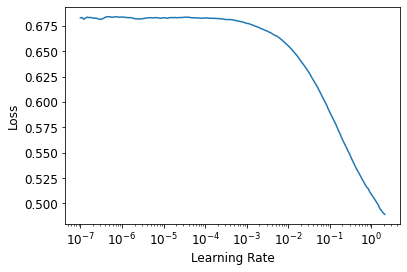

In [16]:
lr_min, lr_steep = learn.lr_find(num_it = 200)

In [17]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.09e-01, steepest point: 1.45e-01


In [18]:
learn.fine_tune(10, 2e-1, wd = 0.15)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.492635,0.646339,0.814200,00:03


epoch,train_loss,valid_loss,roc_auc_score,time
0,0.364146,0.563614,0.848587,00:03
1,0.351296,0.474040,0.865955,00:03
2,0.342904,0.452666,0.870025,00:03
3,0.335210,0.443877,0.875007,00:03
4,0.326078,0.446647,0.873737,00:03
5,0.315976,0.449207,0.875466,00:03
6,0.301503,0.455746,0.870930,00:03
7,0.283655,0.451146,0.875813,00:03
8,0.262197,0.460386,0.875050,00:03
9,0.242082,0.466512,0.874361,00:03


Looks like it isn't overfitting too badly and producing a good auc score. I wanted to try it out on a match that has happened but wasn't in the data used to train the model. The match was between **Gordon Ryan** and **Matheus Diniz**. Gordon Ryan won.

I prepared the data outside of notebook. See below.

In [19]:
# Read in example that is known + drop the dep_var
example_to_test = pd.read_csv("test_match.csv").drop(dep_var, axis = 1)

example_to_test

,year,division,fighter_a,fighter_b,w.x,l.x,leg_locker.x,leg_locked.x,cum_adcc_gold.x,pan am_gold.x,mundial_gold.x,cum_adcc_silver.x,pan am_silver.x,mundial_silver.x,cum_adcc_bronze.x,pan am_bronze.x,mundial_bronze.x,l_yearly.x,w_yearly.x,cum_adcc_lose.x,cum_adcc_match.x,cum_adcc_trials.x,cum_adcc_win.x,cum_lose_dq.x,cum_lose_points.x,cum_lose_sub.x,cum_lose_unknown.x,cum_matches.x,cum_win_dq.x,cum_win_points.x,cum_win_sub.x,cum_win_unknown.x,w.y,l.y,leg_locker.y,leg_locked.y,cum_adcc_gold.y,pan am_gold.y,mundial_gold.y,cum_adcc_silver.y,pan am_silver.y,mundial_silver.y,cum_adcc_bronze.y,pan am_bronze.y,mundial_bronze.y,l_yearly.y,w_yearly.y,cum_adcc_lose.y,cum_adcc_match.y,cum_adcc_trials.y,cum_adcc_win.y,cum_lose_dq.y,cum_lose_points.y,cum_lose_sub.y,cum_lose_unknown.y,cum_matches.y,cum_win_dq.y,cum_win_points.y,cum_win_sub.y,cum_win_unknown.y
0,2020,abs,gordon ryan,matheus diniz,back_choke,points,16,0,0,2,0,0,0,0,0,2,0,points,back_choke,0,0,0,0,0,0,0,0,2,0,0,3,0,points,points,0,0,0,1,0,0,0,0,0,2,0,points,points,0,0,0,0,0,0,0,0,1,0,1,1,0


Now to get the test dataloader and get the prediction for the match.

In [20]:
# Create dataloader
dl = learn.dls.test_dl(example_to_test)

# Get the predictions
raw_preds = learn.get_preds(dl = dl)

raw_preds[0]

tensor([[0.0578, 0.9422]])

Looks like it would have predicted a **~94%** win. Knowing what a dominant force Gordon Ryan is in Jiu Jitsu it comes as no surprise.

###**Xgboost**

I've chosen to use **Nvidia's RAPIDS** mainly to learn some new things. It will come in handy when working with larger datasets given it utilises GPUs. There will most likely be minimal speed up given the dataset isn't massive.

In [1]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 185 (delta 5), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (185/185), 57.14 KiB | 11.43 MiB/s, done.
Resolving deltas: 100% (67/67), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rap

###**Import packages**

In [21]:
import xgboost as xgb
import cuml
import cudf
import cupy

###**Setup up data**
The reason I used fast ai first was so I can easily process the data and get the appropriate datasets for xgboost easily.

In [22]:
# Get inputs and targets for training and validation datasets
xs_train, ys_train = dls.train_ds.xs, dls.train_ds.ys.values.ravel()
xs_valid, ys_valid = dls.valid_ds.xs, dls.valid_ds.ys.values.ravel()
col_names = dls.train_ds.xs.columns

In [23]:
# Convert all to a RAPIDS dataframe (cudf)
xs_train = cudf.from_pandas(xs_train)
ys_train = cudf.Series(ys_train)
xs_valid = cudf.from_pandas(xs_valid)
ys_valid = cudf.Series(ys_valid)

In [24]:
# Convert to DMatrix for xgboost
dtrain = xgb.DMatrix(xs_train, label = ys_train)
dvalidation = xgb.DMatrix(xs_valid, label = ys_valid)

###**Set basic parameters for xgboost and train it**

In [25]:
# Set up parameters
params = {'max_depth': 5,
          'eval_metric': 'auc', 
          'objective': 'binary:logistic'}

In [26]:
# Set validation and training datasets up and number of rounds
evallist = [(dvalidation, 'validation'), (dtrain, 'train')]
num_round = 50

In [27]:
# Run the training
bst = xgb.train(params, dtrain, num_round, evallist)

[0]	validation-auc:0.84802	train-auc:0.87865
[1]	validation-auc:0.85375	train-auc:0.88496
[2]	validation-auc:0.85663	train-auc:0.88859
[3]	validation-auc:0.85967	train-auc:0.89154
[4]	validation-auc:0.86022	train-auc:0.89295
[5]	validation-auc:0.86028	train-auc:0.89514
[6]	validation-auc:0.86147	train-auc:0.89753
[7]	validation-auc:0.86166	train-auc:0.89890
[8]	validation-auc:0.86189	train-auc:0.90017
[9]	validation-auc:0.86235	train-auc:0.90182
[10]	validation-auc:0.86262	train-auc:0.90296
[11]	validation-auc:0.86427	train-auc:0.90512
[12]	validation-auc:0.86445	train-auc:0.90593
[13]	validation-auc:0.86446	train-auc:0.90707
[14]	validation-auc:0.86445	train-auc:0.90775
[15]	validation-auc:0.86443	train-auc:0.90859
[16]	validation-auc:0.86471	train-auc:0.90953
[17]	validation-auc:0.86498	train-auc:0.91012
[18]	validation-auc:0.86499	train-auc:0.91073
[19]	validation-auc:0.86462	train-auc:0.91138
[20]	validation-auc:0.86487	train-auc:0.91212
[21]	validation-auc:0.86528	train-auc:0.9125

Not too bad either.

##**Further considerations**
As mentioned this is a baseline model but I feel it could definitely by progressed.

* Better feature engineering - count/target encoding?
* Alternative models - Tabnet?
* Interpretation plots - SHAP?
* Further hyperparameter tuning

The main one I would consider is the feature engineering. During mini tests adding features made a huge difference to AUC scores rather than hyper parameter tuning.


That's the modelling side of things, but there is also a huge opportunity to analyse fighter's styles and those that seem to be successful. 

Using the feature mentioned earlier `leg_locker` as an example. Are leg lockers a dominant force? If they are and you are a fighter who isn't one and gets submitted with them often consider learning them? Who knows, but I see there being multiple angles to use the data which isn't being explored in the BJJ world.
